In [47]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

tickers = ['AEVA', 'ATRO', 'DRD', 'GRPN', 'NGVC', 'RDFN', 'ROOT', 'TDUP']
start_date = "2022-01-01"
end_date = "2024-12-31"

data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')
data = data.stack(-2)[["Close", "Volume"]]

[*********************100%***********************]  8 of 8 completed


In [48]:
df = data.unstack()

In [49]:
## Claculate return
close_df = df['Close']
log_returns = np.log(close_df / close_df.shift(1))
log_returns = log_returns.dropna()


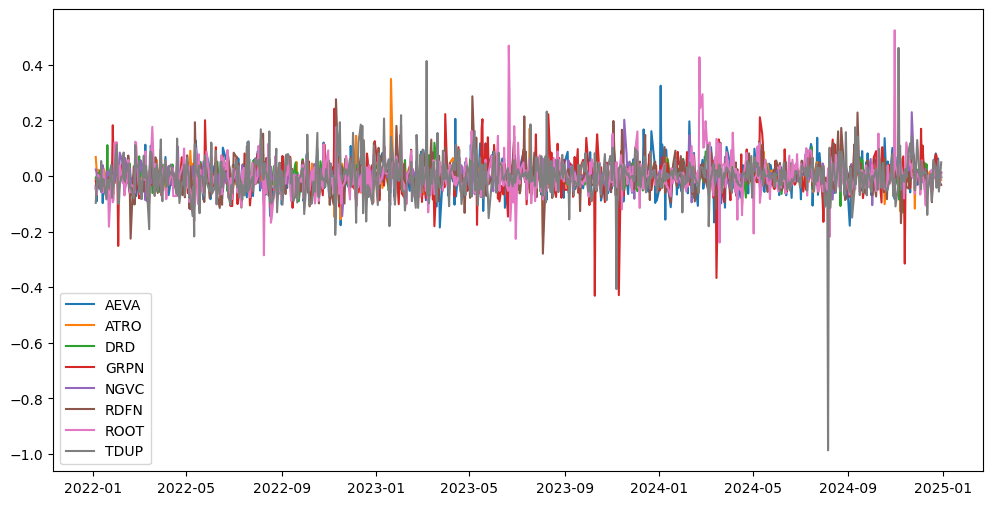

In [50]:
## return plot
plt.figure(figsize=(12, 6))
for ticker in log_returns.columns:
    plt.plot(log_returns.index, log_returns[ticker], label=ticker)
plt.legend()
plt.show()

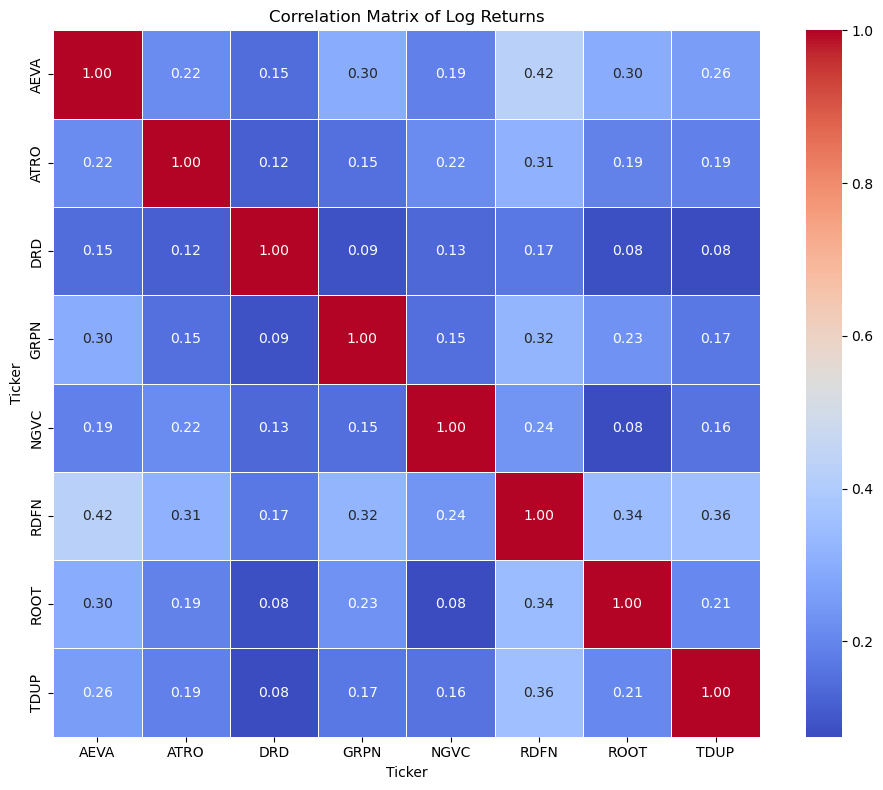

In [57]:
import seaborn as sns
correlation_matrix = log_returns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Matrix of Log Returns')
plt.tight_layout()
plt.show()

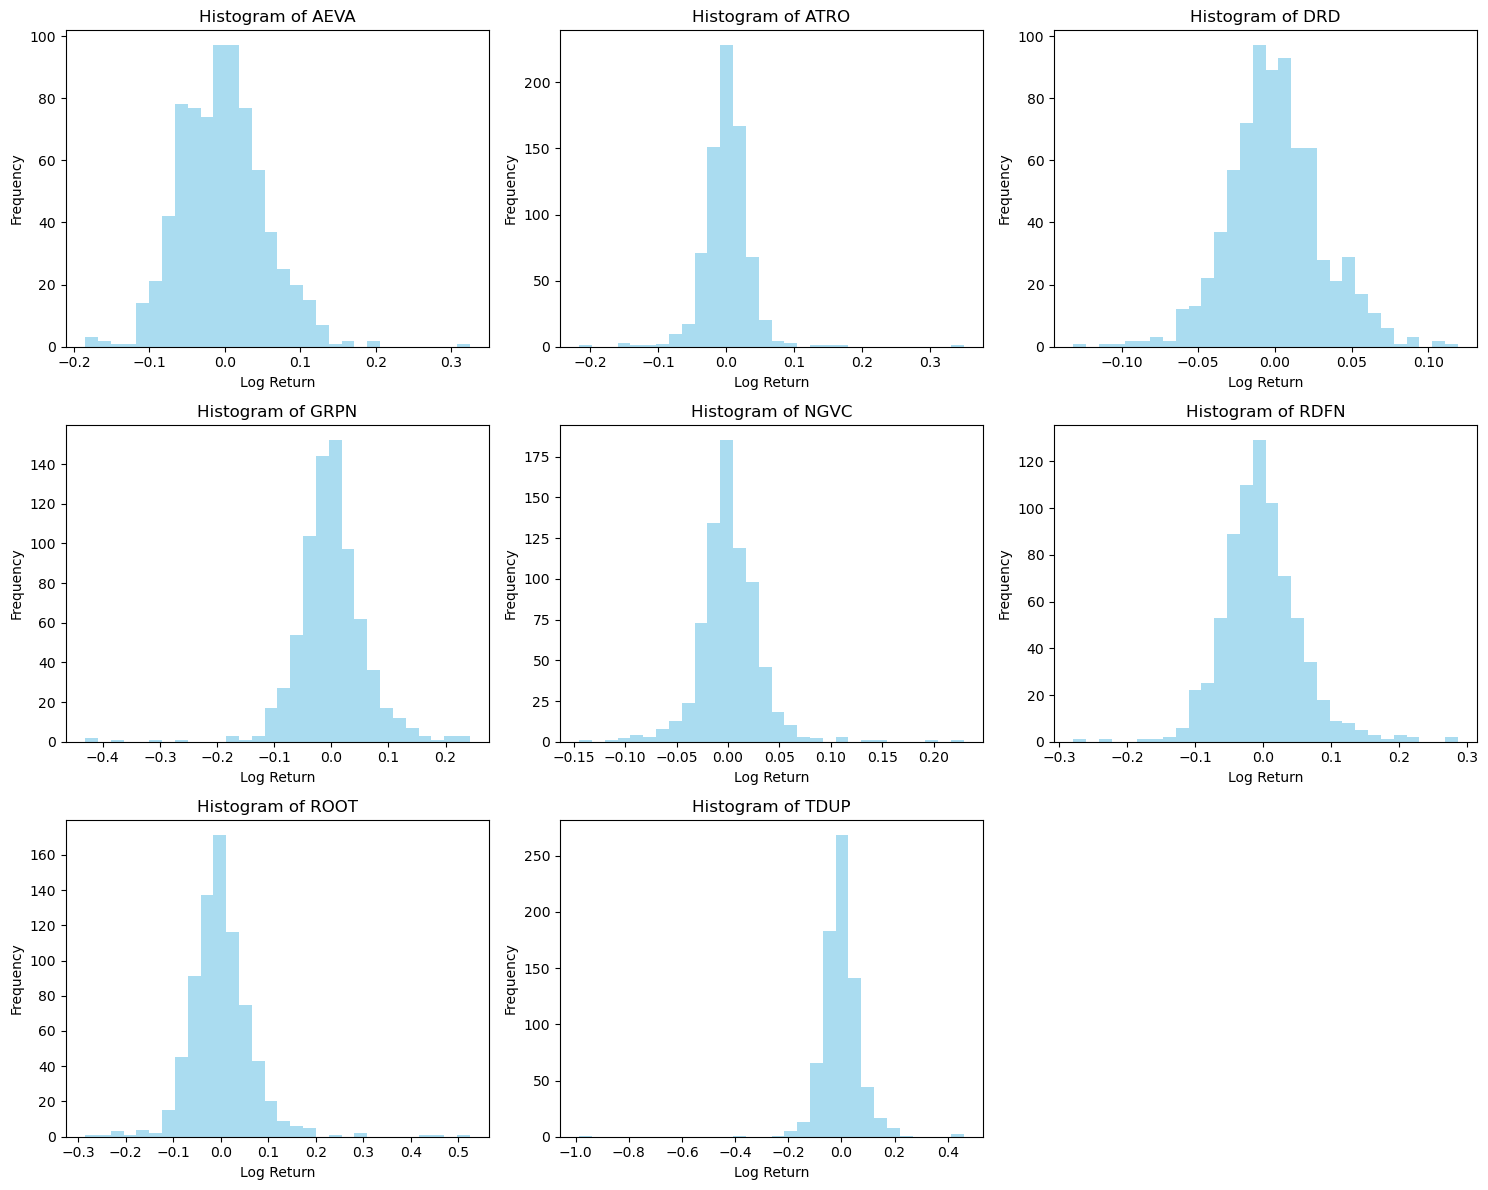

In [58]:
import matplotlib.pyplot as plt

num_tickers = len(log_returns.columns)
cols = 3 
rows = (num_tickers + cols - 1) // cols  


fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()  
for i, ticker in enumerate(log_returns.columns):
    axes[i].hist(log_returns[ticker], bins=30, alpha=0.7, color='skyblue')
    axes[i].set_title(f'Histogram of {ticker}')
    axes[i].set_xlabel('Log Return')
    axes[i].set_ylabel('Frequency')


for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


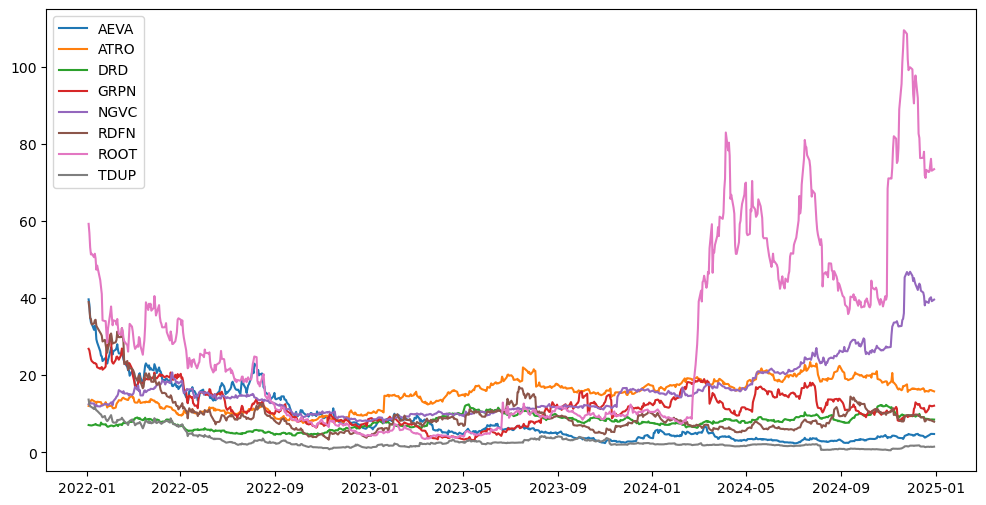

In [52]:
## Price plot
plt.figure(figsize=(12, 6))
for ticker in close_df.columns:
    plt.plot(close_df.index, close_df[ticker], label=ticker)
plt.legend()
plt.show()

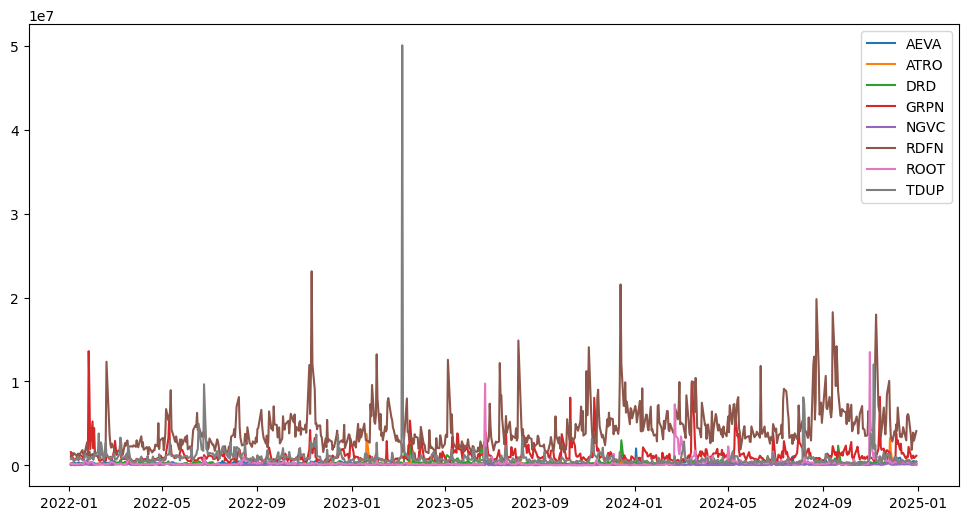

In [53]:
## volume plot
volume_df = df['Volume']
plt.figure(figsize=(12, 6))
for ticker in volume_df.columns:
    plt.plot(volume_df.index, volume_df[ticker], label=ticker)
plt.legend()
plt.show()

In [ ]:
correlation_matrix = log_returns.corr()
print(correlation_matrix)